## About

Notebok to read and plot Heart rate exports from Fitbit

- Author : Jal Panchal

In [180]:
import numpy as np
import os
import cv2
import json
import matplotlib.pyplot as plt
from datetime import date, time, datetime, timedelta

In [17]:
with open('./../data/0708_export_jal/PioneerWearable/Physical Activity/heart_rate-2021-07-06.json', 'r') as file:
     kp_0331_1 = json.load(file)

In [18]:
#get all the json files for heart rate
path_to_hr_json = "./../data/0708_export_jal/PioneerWearable/Physical Activity/"
hr_json_files = [pos_json for pos_json in os.listdir(path_to_hr_json) if pos_json.endswith('.json') and pos_json.startswith('heart_rate')]

#sort them based on date
hr_json_files = np.sort(hr_json_files)

In [186]:
#Read json files and parse date, time and Heart rate in bpm
hr_data = pd.DataFrame()
for file in hr_json_files:
    
    temp_list= json.load(open(path_to_hr_json+file))
    temp1 = pd.DataFrame(temp_list)
    temp2 = pd.DataFrame(temp1.value.tolist())
    temp2['dateTime'] = pd.to_datetime(temp1.dateTime, format='%m/%d/%y %H:%M:%S')
    
    #append data from all days
    hr_data = hr_data.append(temp2)
    

In [229]:
#reset index
hr_data = hr_data.reset_index()
hr_data = hr_data.set_index('dateTime')

In [188]:
hr_data

,index,bpm,confidence,dateTime
0,0,70,1,2021-05-12 21:56:02
1,1,80,1,2021-05-12 21:56:07
2,2,84,1,2021-05-12 21:56:17
3,3,80,1,2021-05-12 21:56:22
4,4,77,1,2021-05-12 21:56:27
...,...,...,...,...
597366,11496,83,1,2021-07-08 02:14:18
597367,11497,82,1,2021-07-08 02:14:23
597368,11498,79,1,2021-07-08 02:14:28
597369,11499,81,1,2021-07-08 02:14:33


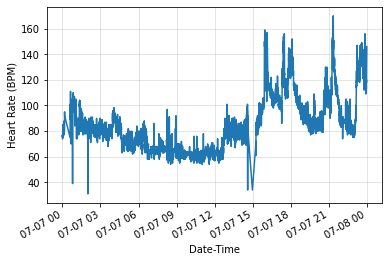

In [235]:
#plot single day data
start_date = datetime(2021,7,7)
num_days = 1
end_date = start_date + timedelta(days=num_days)

sel_data = hr_data[(hr_data.index >start_date) &  (hr_data.index < end_date)]

ax = plt.gca()
plt.plot(sel_data.index, sel_data.bpm)
plt.gcf().autofmt_xdate()
ax.set_ylabel("Heart Rate (BPM)")
ax.set_xlabel("Date-Time")
ax.grid(alpha=0.4)

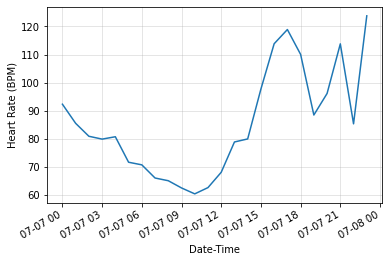

In [240]:
#plot single day data average over an hour
start_date = datetime(2021,7,7)
num_days = 1
end_date = start_date + timedelta(days=num_days)

sel_data = hr_data[(hr_data.index >start_date) &  (hr_data.index < end_date)]
sel_data = sel_data.resample('1H').mean()

ax = plt.gca()
plt.plot(sel_data.index, sel_data.bpm)
plt.gcf().autofmt_xdate()
ax.set_ylabel("Heart Rate (BPM)")
ax.set_xlabel("Date-Time")
ax.grid(alpha=0.4)

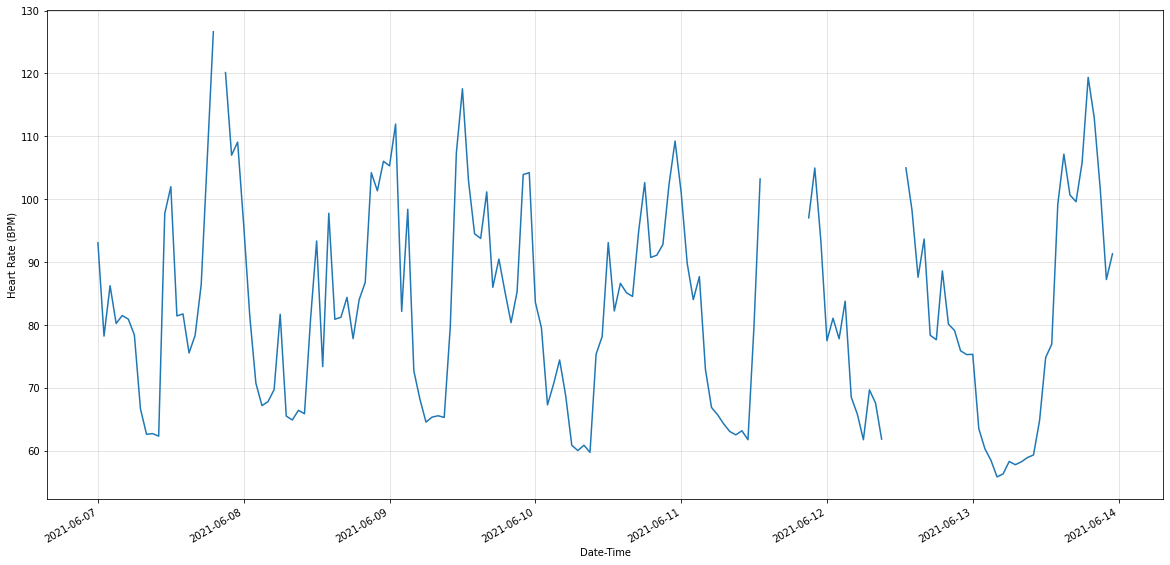

In [260]:
#plot week  data average over an hour
start_date = datetime(2021,6,7)
num_days = 7
end_date = start_date + timedelta(days=num_days)

sel_data = hr_data[(hr_data.index >start_date) &  (hr_data.index < end_date)]
sel_data = sel_data.resample('1H').mean()

ax = plt.gca()
fig = plt.gcf()
plt.plot(sel_data.index, sel_data.bpm)
plt.gcf().autofmt_xdate()
ax.set_ylabel("Heart Rate (BPM)")
ax.set_xlabel("Date-Time")
ax.grid(alpha=0.4)
fig.set_size_inches(20,10)

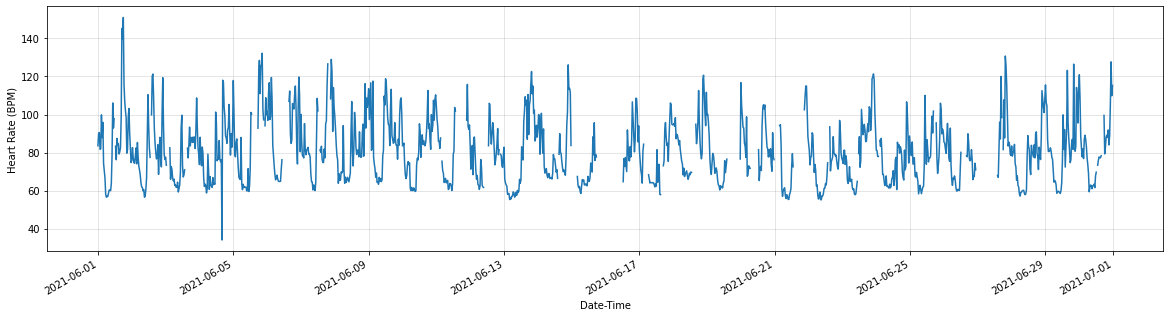

In [261]:
#plot Month of June, 30 min  average
start_date = datetime(2021,6,1)
num_days = 30
end_date = start_date + timedelta(days=num_days)

sel_data = hr_data[(hr_data.index >start_date) &  (hr_data.index < end_date)]
sel_data = sel_data.resample('0.5H').mean()

ax = plt.gca()
fig = plt.gcf()
plt.plot(sel_data.index, sel_data.bpm)
plt.gcf().autofmt_xdate()
ax.set_ylabel("Heart Rate (BPM)")
ax.set_xlabel("Date-Time")
ax.grid(alpha=0.4)
fig.set_size_inches(20,5)
